## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_complete = pd. merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
totMice_l = list(mouse_complete['Mouse ID'].unique())
totMice_n=len(totMice_l)
totMice_n
#mice_l = (mouse_complete)['Mouse ID'].value_counts()
#mice_l


249

In [28]:
mouse_complete['Drug Regimen'].value_counts()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_complete.count
#duplicate = []

duplicateDFRow = mouse_complete[mouse_complete.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicateDFRow)
#mouse_complete['Timepoint'].value_counts()
#mouse_complete.head(40)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [5]:
duplicateDFRow = mouse_complete[mouse_complete.duplicated(subset = ['Mouse ID', 'Timepoint'])]
mouse_complete = mouse_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [6]:
mouse_complete['Timepoint'].value_counts()


0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice in the clean DataFrame.
check_mouse = list(mouse_complete['Mouse ID'].unique())
check_mouse_n = len(check_mouse)
check_mouse_n

249

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
#volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#probably an inefficient way to do this

drug_l = list(mouse_complete['Drug Regimen'].unique())

tumor_avg = mouse_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = mouse_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]


summary_df = pd.DataFrame(drug_l)
summary_df.columns = ["Drug Regimen"] 
summary_df = summary_df.sort_values(by = ['Drug Regimen'])
avg = pd.DataFrame(tumor_avg)
med = pd.DataFrame(tumor_median)
sum_df = pd. merge(avg, summary_df, how = "left", on = ["Drug Regimen", "Drug Regimen"])
sum_df.rename(columns = {'Tumor Volume (mm3)':'Mean Volume'}, inplace = True) 
sum_df = pd. merge(sum_df, med, how = "left", on = ["Drug Regimen", "Drug Regimen"])
sum_df.rename(columns = {'Tumor Volume (mm3)':'Median Volume'}, inplace = True) 
var = mouse_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': np.var})
sum_df = pd.merge(sum_df, var, how = "left", on = ["Drug Regimen", "Drug Regimen"])
sum_df.rename(columns = {'Tumor Volume (mm3)': 'Variance'}, inplace = True)
stddev = mouse_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': np.std})
sum_df = pd.merge(sum_df, stddev, how = "left", on = ["Drug Regimen", "Drug Regimen"])
sum_df.rename(columns = {'Tumor Volume (mm3)': 'Standard Deviation'}, inplace = True)
sum_df


,Drug Regimen,Mean Volume,Median Volume,Variance,Standard Deviation
0,Capomulin,40.675741,41.557809,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003
6,Propriva,52.322552,50.854632,42.351070,6.507770
7,Ramicane,40.216745,40.673236,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arrange(len())
plt.bar()

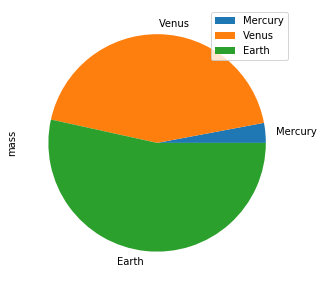

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index =['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))


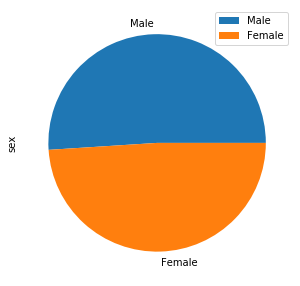

In [85]:
sex_df = pd.DataFrame({'sex': [25, 24]}, index =['Male', 'Female'])
pandas_pie = sex_df.plot.pie(y="sex", figsize = (5,5))

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

drug_l

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [112]:
#reduces the dataframe down to the four drugs needed for the boxplots
reduced_drugs = mouse_complete.copy()
drop_drugs = reduced_drugs[reduced_drugs['Drug Regimen']=="Naftisol"].index
reduced_drugs.drop(drop_drugs, inplace=True)
drop_drugs2 = reduced_drugs[reduced_drugs['Drug Regimen']=="Placebo"].index
reduced_drugs.drop(drop_drugs2, inplace=True)
drop_drugs3 = reduced_drugs[reduced_drugs['Drug Regimen']=="Stelasyn"].index
reduced_drugs.drop(drop_drugs3, inplace=True)
drop_drugs4 = reduced_drugs[reduced_drugs['Drug Regimen']=="Zoniferol"].index
reduced_drugs.drop(drop_drugs4, inplace=True)
drop_drugs5 = reduced_drugs[reduced_drugs['Drug Regimen']=="Ketapril"].index
reduced_drugs.drop(drop_drugs5, inplace=True)
drop_drugs6 = reduced_drugs[reduced_drugs['Drug Regimen']=="Propriva"].index
reduced_drugs.drop(drop_drugs6, inplace=True)
drop_drugs7 = reduced_drugs[reduced_drugs['Drug Regimen']=="Naftisol"].index
reduced_drugs.drop(drop_drugs7, inplace=True)

reduced_sort = reduced_drugs.sort_values(by = ["Mouse ID", "Timepoint"], ascending = (False))
reduced_drugs_timepoint = reduced_sort.drop_duplicates(subset=['Mouse ID'])
reduced_drugs_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
430,a444,Ramicane,Female,10,25,45,43.047543,0
327,a411,Ramicane,Male,3,22,45,38.407618,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
473,a251,Infubinol,Female,21,25,45,65.525743,1


In [129]:
treatment=reduced_drugs_timepoint["Drug Regimen"].tolist()

['Infubinol',
 'Ramicane',
 'Ceftamin',
 'Capomulin',
 'Ceftamin',
 'Ramicane',
 'Infubinol',
 'Ceftamin',
 'Ceftamin',
 'Capomulin',
 'Ceftamin',
 'Capomulin',
 'Ramicane',
 'Infubinol',
 'Infubinol',
 'Ceftamin',
 'Capomulin',
 'Capomulin',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Capomulin',
 'Ramicane',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Capomulin',
 'Capomulin',
 'Ramicane',
 'Capomulin',
 'Infubinol',
 'Capomulin',
 'Ramicane',
 'Ramicane',
 'Capomulin',
 'Capomulin',
 'Ramicane',
 'Ramicane',
 'Ceftamin',
 'Infubinol',
 'Ceftamin',
 'Infubinol',
 'Infubinol',
 'Ceftamin',
 'Infubinol',
 'Ramicane',
 'Capomulin',
 'Infubinol',
 'Capomulin',
 'Ramicane',
 'Capomulin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Capomulin',
 'Ceftamin',
 'Ceftamin',
 'Infubinol',
 'Infubinol',
 'Ramicane',
 'Ceftamin',
 'Ramicane',
 'Ramicane',
 'Ceftamin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Infubinol',
 'Ramicane',
 'Ramicane',
 'Ceftamin',
 'Ramicane',
 'Capomulin',
 

In [139]:
# Put treatments into a list for for loop (and later for plot labels)
reduced_drug_l = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

q2 = reduced_drugs_timepoint.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]


#Capomulin = reduced_drugs_timepoint['Drug Regimen']=="Capomulin"            

Capomulin_df =reduced_drugs_timepoint[reduced_drugs_timepoint['Drug Regimen']=="Capomulin"]
#Capomulin_df

In [161]:
tumor_l = []
for x in reduced_drug_l:
    drug_df = reduced_drugs_timepoint[reduced_drugs_timepoint['Drug Regimen']==x]
    tumor_l.append(drug_df["Tumor Volume (mm3)"].tolist())

tumor_l

[[31.896238399999998,
  28.48403281,
  36.04104736,
  39.95234669,
  40.65812366,
  31.02392294,
  34.45529799,
  40.72857787,
  23.34359787,
  41.58152074,
  32.37735684,
  46.53920617,
  33.32909778,
  28.43096411,
  38.84687569,
  41.48300765,
  38.75326548,
  38.125164399999996,
  37.31184577,
  47.68596303,
  40.1592203,
  37.07402422,
  30.48598484,
  38.93963263,
  38.98287774],
 [30.63869575,
  44.18345092,
  43.16637266,
  40.66771292,
  30.27623175,
  43.41938077,
  37.22565033,
  36.56165229,
  45.22086888,
  31.09533505,
  30.56462509,
  22.05012627,
  36.13485243,
  31.56046955,
  36.37451039,
  33.56240217,
  29.12847181,
  40.65900627,
  37.31123552,
  33.39765251,
  38.34200823,
  32.97852192,
  38.81036633,
  43.04754260000001,
  38.407618299999996],
 [62.75445141,
  67.68556862,
  58.26844248,
  50.00513807,
  51.54243058,
  54.04860769,
  46.25011212,
  55.65068132,
  54.65654872,
  45.69933088,
  55.62942846,
  60.16518046,
  47.01036401,
  62.11727887,
  66.1969115

Text(0.5, 0, 'Drug Regimen')

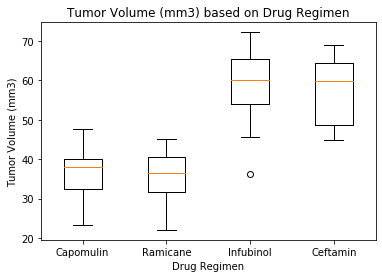

In [160]:
#reduces the dataframe down to the four drugs needed for the boxplots
reduced_drugs = mouse_complete.copy()
drop_drugs = reduced_drugs[reduced_drugs['Drug Regimen']=="Naftisol"].index
reduced_drugs.drop(drop_drugs, inplace=True)
drop_drugs2 = reduced_drugs[reduced_drugs['Drug Regimen']=="Placebo"].index
reduced_drugs.drop(drop_drugs2, inplace=True)
drop_drugs3 = reduced_drugs[reduced_drugs['Drug Regimen']=="Stelasyn"].index
reduced_drugs.drop(drop_drugs3, inplace=True)
drop_drugs4 = reduced_drugs[reduced_drugs['Drug Regimen']=="Zoniferol"].index
reduced_drugs.drop(drop_drugs4, inplace=True)
drop_drugs5 = reduced_drugs[reduced_drugs['Drug Regimen']=="Ketapril"].index
reduced_drugs.drop(drop_drugs5, inplace=True)
drop_drugs6 = reduced_drugs[reduced_drugs['Drug Regimen']=="Propriva"].index
reduced_drugs.drop(drop_drugs6, inplace=True)
drop_drugs7 = reduced_drugs[reduced_drugs['Drug Regimen']=="Naftisol"].index
reduced_drugs.drop(drop_drugs7, inplace=True)

reduced_sort = reduced_drugs.sort_values(by = ["Mouse ID", "Timepoint"], ascending = (False))
reduced_drugs_timepoint = reduced_sort.drop_duplicates(subset=['Mouse ID'])
reduced_drug_l = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_l = []
for x in reduced_drug_l:
    drug_df = reduced_drugs_timepoint[reduced_drugs_timepoint['Drug Regimen']==x]
    tumor_l.append(drug_df["Tumor Volume (mm3)"].tolist())
fig2, ax2 = plt.subplots()
ax2.set_title("title")
ax2.boxplot(tumor_l)
plt.setp(ax2.collections, alpha = .25)
plt.xticks([1,2,3,4], (reduced_drug_l))
ax2.set_title('Tumor Volume (mm3) based on Drug Regimen')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Drug Regimen')

In [124]:
# Put treatments into a list for for loop (and later for plot labels)
reduced_drug_l = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for x in :
        #print(reduced_drugs_timepoint["Drug Regimen"])
    reduced_drugs_timepoint["Drug Regimen"] == x
         tumor_vol.append(["Tumor Volume (mm3)"])
tumor_vol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

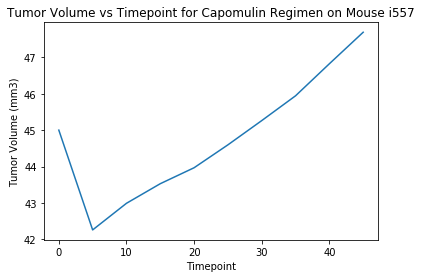

In [215]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_tot = mouse_complete[mouse_complete['Drug Regimen']=="Capomulin"]
Capomulin_mouse = Capomulin_tot[Capomulin_tot['Mouse ID']=="i557"]
Capomulin_mouse
plt.plot(Capomulin_mouse["Timepoint"], Capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Timepoint for Capomulin Regimen on Mouse i557")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

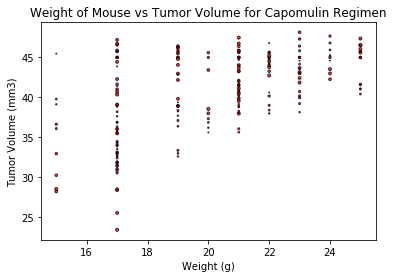

In [208]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_tot = mouse_complete[mouse_complete['Drug Regimen']=="Capomulin"]
plt.scatter(Capomulin_tot["Weight (g)"], Capomulin_tot["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Weight of Mouse vs Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [222]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_vol = Capomulin_tot["Tumor Volume (mm3)"].mean()
volume = Capomulin_tot.iloc[:,6]
weight = Capomulin_tot.iloc[:,4]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.53


Text(20, 25, 'y = 0.96x + 21.49')

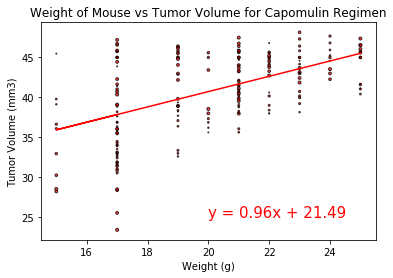

In [226]:
from scipy.stats import linregress

plt.scatter(Capomulin_tot["Weight (g)"], Capomulin_tot["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Weight of Mouse vs Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
x_values = Capomulin_tot ["Weight (g)"]
y_values = Capomulin_tot ["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,25), fontsize = 15, color = "red")

In [218]:
Capomulin_tot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [30]:
duplicates = mouse_complete[mouse_complete.duplicated(['Mouse ID'])]
single = mouse_complete.drop_duplicates(subset=['Mouse ID'])
single

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [36]:

drug_counts
drug_l

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

Text(0, 0.5, 'Number of Mice')

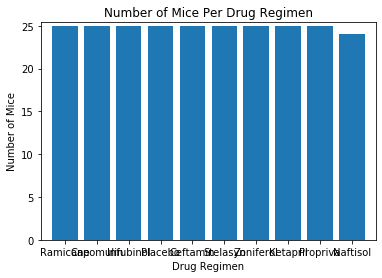

In [45]:
single = mouse_complete.drop_duplicates(subset=['Mouse ID'])
drug_counts = single['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_counts))
plt.bar(x_axis, drug_counts, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_l)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_counts)+0.4)
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [64]:

sex = single['Sex'].value_counts
sex
#tumor_avg = mouse_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
sex_group = single.groupby(["Sex"])
sex_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
85,j913,Ramicane,Female,4,17,0,45.0,0
125,r554,Capomulin,Female,8,17,0,45.0,0
135,m957,Capomulin,Female,3,19,0,45.0,0


In [ ]:
dataFrame.plot.bar(x="City", y="Visits", rot=70, title="Number of tourist visits - Year 2018");

plot.show(block=True);

In [48]:
single.plot.bar(x = drug_l, y = drug_counts, rot=70, title = "Number of Mice Per Drug Regimen");
plot.show(block=True);

KeyError: "None of [Index(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn',\n       'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],\n      dtype='object')] are in the [columns]"

Text(0, 0.5, 'Number of Mice')

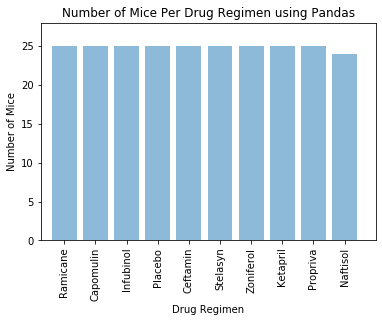

In [56]:
ticks_loc = [value for value in x_axis]
plt.bar(x_axis, drug_counts, alpha = 0.5, align = "center")
plt.xticks(ticks_loc, drug_l, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(drug_counts)+3)
plt.title("Number of Mice Per Drug Regimen using Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [65]:
single

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [70]:

single_sort = single.sort_values(by = ['Sex'])
sex_n = single_sort['Sex'].value_counts()
labels = ["Male", "Female"]
colors = ["blue", "red"]
explode = (0.1, 0)
sex_n

Male      125
Female    124
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe537083510>,
 [Text(-0.7655308193487089, -0.9241009493704108, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327395, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

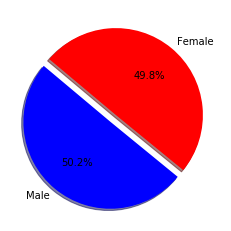

In [71]:
plt.pie(sex_n, explode = explode, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 140)

In [196]:
Ceftamin = reduced_drugs_timepoint[reduced_drugs_timepoint['Drug Regimen']=="Ceftamin"]
Ramicane = reduced_drugs_timepoint[reduced_drugs_timepoint['Drug Regimen']=="Ramicane"]
Infubinol = reduced_drugs_timepoint[reduced_drugs_timepoint['Drug Regimen']=="Infubinol"]
Capomulin = reduced_drugs_timepoint[reduced_drugs_timepoint['Drug Regimen']=="Capomulin"]

Capomulin_quart = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Cap_lowerq =Capomulin_quart[0.25]
Cap_upperq =Capomulin_quart[0.75]
Cap_iqr = (Cap_upperq-Cap_lowerq)
Ramicane_quart = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ram_lowerq =Ramicane_quart[0.25]
Ram_upperq =Ramicane_quart[0.75]
Ram_iqr = (Ram_upperq-Ram_lowerq)
Infubinol_quart = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Inf_lowerq =Infubinol_quart[0.25]
Inf_upperq =Infubinol_quart[0.75]
Inf_iqr = (Inf_upperq-Inf_lowerq)
Ceftamin_quart = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Cef_lowerq =Ceftamin_quart[0.25]
Cef_upperq =Ceftamin_quart[0.75]
Cef_iqr = (Cef_upperq-Inf_lowerq)

print(f"The lower quartile of Ceftamin is: {Cef_lowerq}")
print(f"The upper quartile of Ceftamin is: {Cef_upperq}")
print(f"The interquartile range of Ceftamin is: {Cef_iqr}")
print(f"The the median of Ceftamin is: {Ceftamin_quart[0.5]} ")

lower_bound = Cef_lowerq - (1.5*Cef_iqr)
upper_bound = Cef_upperq + (1.5*Cef_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")

print(f"The lower quartile of Ramicane is: {Ram_lowerq}")
print(f"The upper quartile of Ramicane is: {Ram_upperq}")
print(f"The interquartile range of Ramicane is: {Ram_iqr}")
print(f"The the median of Ramicane is: {Ramicane_quart[0.5]} ")

lower_bound = Ram_lowerq - (1.5*Ram_iqr)
upper_bound = Ram_upperq + (1.5*Ram_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")


print(f"The lower quartile of Capomulin is: {Cap_lowerq}")
print(f"The upper quartile of Capomulin is: {Cap_upperq}")
print(f"The interquartile range of Capomulin is: {Cap_iqr}")
print(f"The the median of Capomulin is: {Capomulin_quart[0.5]} ")

lower_bound = Cap_lowerq - (1.5*Cap_iqr)
upper_bound = Cap_upperq + (1.5*Cap_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-----------------------------------------------")


print(f"The lower quartile of Infubinol is: {Inf_lowerq}")
print(f"The upper quartile of Infubinol is: {Inf_upperq}")
print(f"The interquartile range of Infubinol is: {Inf_iqr}")
print(f"The the median of Infubinol is: {Infubinol_quart[0.5]} ")

lower_bound = Inf_lowerq - (1.5*Inf_iqr)
upper_bound = Inf_upperq + (1.5*Inf_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 10.251222339999998
The the median of Ceftamin is: 59.85195552 
Values below 33.34524434 could be outliers.
Values above 79.67666353999999 could be outliers.
-----------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
----------------------

In [174]:
#drug_df2
reduced_drug_l

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']